# BootCamp 2019 - Week 5

## Pandas - 3: Grouping

<img src="Img_panda3.jpg" width="400">

Author: Martina Fraschini

In [1]:
# import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pydataset import data

### Problem 1 - iris

In [44]:
# load data
iris = data("iris")
data("iris", show_doc=True)
iris.sample(5)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
38,4.9,3.6,1.4,0.1,setosa
148,6.5,3.0,5.2,2.0,virginica
58,4.9,2.4,3.3,1.0,versicolor
97,5.7,2.9,4.2,1.3,versicolor
40,5.1,3.4,1.5,0.2,setosa


In [7]:
# group by species
species = iris.groupby("Species")
list(species.groups)

['setosa', 'versicolor', 'virginica']

In [13]:
species.get_group("setosa").sample(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
25,4.8,3.4,1.9,0.2,setosa
1,5.1,3.5,1.4,0.2,setosa
31,4.8,3.1,1.6,0.2,setosa
14,4.3,3.0,1.1,0.1,setosa
30,4.7,3.2,1.6,0.2,setosa


In [14]:
species.get_group("versicolor").sample(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
64,6.1,2.9,4.7,1.4,versicolor
85,5.4,3.0,4.5,1.5,versicolor
66,6.7,3.1,4.4,1.4,versicolor
94,5.0,2.3,3.3,1.0,versicolor
91,5.5,2.6,4.4,1.2,versicolor


In [15]:
species.get_group("virginica").sample(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
144,6.8,3.2,5.9,2.3,virginica
117,6.5,3.0,5.5,1.8,virginica
104,6.3,2.9,5.6,1.8,virginica
121,6.9,3.2,5.7,2.3,virginica
140,6.9,3.1,5.4,2.1,virginica


In [16]:
species["Sepal.Length"].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


In [17]:
species["Sepal.Width"].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
setosa,50.0,3.428,0.379064,2.3,3.200,3.4,3.675,4.4
versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


In [18]:
species["Petal.Length"].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
setosa,50.0,1.462,0.173664,1.0,1.4,1.50,1.575,1.9
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


In [19]:
species["Petal.Width"].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
setosa,50.0,0.246,0.105386,0.1,0.2,0.2,0.3,0.6
versicolor,50.0,1.326,0.197753,1.0,1.2,1.3,1.5,1.8
virginica,50.0,2.026,0.274650,1.4,1.8,2.0,2.3,2.5


Looking at the length and width of the petals, the setosa species is the easiest to distinguish since it has the smallest petals.

Given the data without the species label, we can again look at the petal length and width to distinguish between them. However, with this method we cannot completely distinguish between versicolor and virginica species, without any further information.

### Problem 1 - poisons

In [25]:
# load data
poisons = data("poisons")
data("poisons", show_doc=True)
poisons.sample(5)

poisons

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

##  Animal Survival Times

### Description

The `poisons` data frame has 48 rows and 3 columns.

The data form a 3x4 factorial experiment, the factors being three poisons and
four treatments. Each combination of the two factors was used for four
animals, the allocation to animals having been completely randomized.

### Usage

    poisons

### Format

This data frame contains the following columns:

`time`

The survival time of the animal in units of 10 hours.

`poison`

A factor with levels `1`, `2` and `3` giving the type of poison used.

`treat`

A factor with levels `A`, `B`, `C` and `D` giving the treatment.

### Source

The data were obtained from

Box, G.E.P. and Cox, D.R. (1964) An analysis of transformations (with
Discussion). _ Journal of the Royal Statistical Society, B_, **26**, 211–252.

### References

Davison, A.C. and Hinkley, D.V. (1997) _Bootstrap Methods and Their
Applica

,time,poison,treat
29,0.44,2,C
19,0.49,2,B
42,1.02,2,D
39,0.66,1,D
13,0.82,1,B


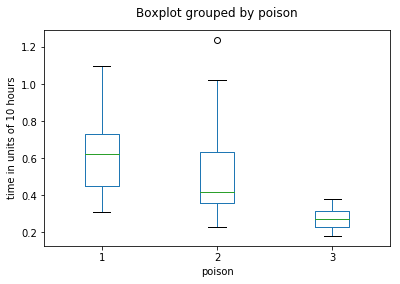

In [31]:
poisons.boxplot(["time"], by="poison", grid=False)
plt.title("")
plt.ylabel("time in units of 10 hours")
plt.show()

The most deadly poison is the third one as the survival time is on average lower than the others, without outliers.

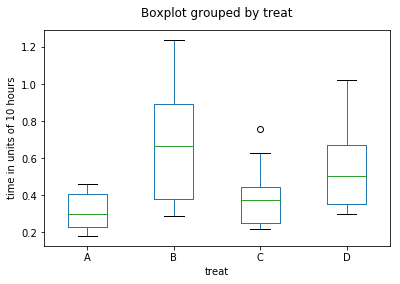

In [32]:
poisons.boxplot(["time"], by="treat", grid=False)
plt.title("")
plt.ylabel("time in units of 10 hours")
plt.show()

In [33]:
treatment = poisons.groupby(["poison", "treat"])
treatment["time"].describe()

count    mean       std   min     25%    50%     75%   max
poison treat                                                            
1      A        4.0  0.4125  0.069462  0.31  0.4000  0.440  0.4525  0.46
       B        4.0  0.8800  0.160831  0.72  0.7950  0.850  0.9350  1.10
       C        4.0  0.5675  0.156711  0.43  0.4450  0.540  0.6625  0.76
       D        4.0  0.6100  0.112842  0.45  0.5775  0.640  0.6725  0.71
2      A        4.0  0.3200  0.075277  0.23  0.2750  0.325  0.3700  0.40
       B        4.0  0.8150  0.336303  0.49  0.5800  0.765  1.0000  1.24
       C        4.0  0.3750  0.056862  0.31  0.3400  0.375  0.4100  0.44
       D        4.0  0.6675  0.270970  0.38  0.5150  0.635  0.7875  1.02
3      A        4.0  0.2100  0.021602  0.18  0.2025  0.215  0.2225  0.23
       B        4.0  0.3350  0.046547  0.29  0.2975  0.335  0.3725  0.38
       C        4.0  0.2350  0.012910  0.22  0.2275  0.235  0.2425  0.25
       D        4.0  0.3250  0.026458  0.30  0.3075  0.320  0.3375  0.36

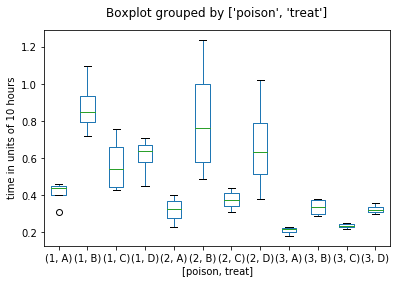

In [41]:
poisons.boxplot(["time"], by=["poison","treat"], grid=False)
plt.title("")
plt.ylabel("time in units of 10 hours")
plt.show()

The most effective treatment is the B as the survival time is on average the largest. I would always choose the B as it seems to be the most effective with all the types of poison.

### Problem 1 - diamonds

In [43]:
# load data
diamonds = data("diamonds")
data("diamonds", show_doc=True)
diamonds.sample(5)

diamonds

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Prices of 50,000 round cut diamonds

### Description

A dataset containing the prices and other attributes of almost 54,000
diamonds. The variables are as follows:

### Usage

    data(diamonds)

### Format

A data frame with 53940 rows and 10 variables

### Details

  * price. price in US dollars (\$326–\$18,823) 

  * carat. weight of the diamond (0.2–5.01) 

  * cut. quality of the cut (Fair, Good, Very Good, Premium, Ideal) 

  * colour. diamond colour, from J (worst) to D (best) 

  * clarity. a measurement of how clear the diamond is (I1 (worst), SI1, SI2, VS1, VS2, VVS1, VVS2, IF (best)) 

  * x. length in mm (0–10.74) 

  * y. width in mm (0–58.9) 

  * z. depth in mm (0–31.8) 

  * depth. total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79) 

  * table. width of top of diamond relative to widest point (43–95) 




,carat,cut,color,clarity,depth,table,price,x,y,z
8103,1.20,Good,D,I1,63.6,60.0,4346,6.72,6.67,4.26
49400,0.50,Very Good,E,VVS2,61.5,59.0,2105,5.08,5.10,3.13
50023,0.61,Good,F,VS1,60.0,65.0,2196,5.53,5.47,3.30
15526,1.01,Good,E,VS2,62.5,58.0,6221,6.32,6.36,3.96
42776,0.50,Fair,F,VS1,62.9,68.0,1348,5.02,4.96,3.14


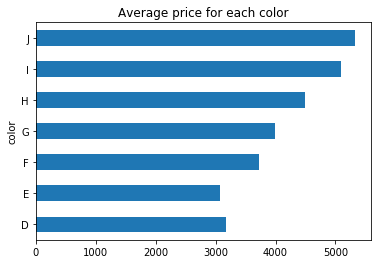

In [48]:
# group by color
diamcol = diamonds.groupby("color")
diamcol["price"].mean().plot(kind="barh", title="Average price for each color")
plt.show()

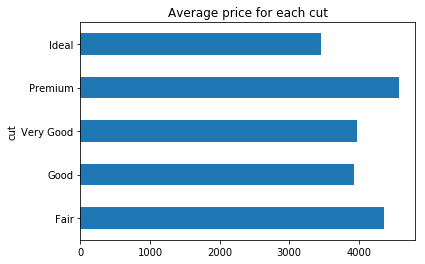

In [53]:
# group by cut
diamcut = diamonds.groupby("cut")
diamcut["price"].mean().loc[list(['Fair','Good','Very Good','Premium','Ideal'])].plot(kind="barh", title="Average price for each cut")
plt.show()

If we divide only by color or cut it seems that worse color are sold at higher prices and ideal cuts have the lowest prices on average. This is an unintuitive statistic. This happens because several factors drive the price of diamonds. For example, considering both the color and the cut (as in the table below) the statistic is already more intuitive. However, also carats, clarity and volume are important dirvers.

In [58]:
colcut = diamonds.groupby(["color", "cut"])
colcut["price"].describe()

count         mean          std    min      25%     50%  \
color cut                                                                   
D     Fair        163.0  4291.061350  3286.114238  536.0  2204.50  3730.0   
      Good        662.0  3405.382175  3175.148710  361.0   957.25  2728.5   
      Ideal      2834.0  2629.094566  3001.069919  367.0   854.25  1576.0   
      Premium    1603.0  3631.292576  3711.634010  367.0   958.00  2009.0   
      Very Good  1513.0  3470.467284  3523.753268  357.0   850.00  2310.0   
E     Fair        224.0  3682.312500  2976.651645  337.0  1589.50  2956.0   
      Good        933.0  3423.644159  3330.702061  327.0   969.00  2420.0   
      Ideal      3903.0  2597.550090  2956.007149  326.0   872.00  1437.0   
      Premium    2337.0  3538.914420  3794.987184  326.0   964.00  1928.0   
      Very Good  2400.0  3214.652083  3408.023634  352.0   755.00  1989.5   
F     Fair        312.0  3827.003205  3223.302685  496.0  1641.75  3035.0   
      Good        909.0  3495.750275  3202.411187  357.0  1214.00  2647.0   
      Ideal      3826.0  3374.939362  3766.635328  408.0   900.25  1775.0   
      Premium    2331.0  4324.890176  4012.022756  342.0  1122.00  2841.0   
      Very Good  2164.0  3778.820240  3786.124033  357.0   905.75  2471.0   
G     Fair        314.0  4239.254777  3609.644379  369.0  1985.00  3057.0   
      Good        871.0  4123.482204  3702.504718  394.0  1244.50  3340.0   
      Ideal      4884.0  3720.706388  4006.262468  361.0   891.00  1857.5   
      Premium    2924.0  4500.742134  4356.571034  382.0   984.00  2745.0   
      Very Good  2299.0  3872.753806  3861.375464  354.0   854.00  2437.0   
H     Fair        303.0  5135.683168  3886.481847  659.0  2457.50  3816.0   
      Good        702.0  4276.254986  4020.660488  368.0  1128.75  3468.5   
      Ideal      3115.0  3889.334831  4013.375228  357.0   815.50  2278.0   
      Premium    2360.0  5216.706780  4466.189717  368.0  1168.25  4511.0   
      Very Good  1824.0  4535.390351  4185.798202  337.0  1089.75  3734.0   
I     Fair        175.0  4685.445714  3730.271132  735.0  2324.00  3246.0   
      Good        522.0  5078.532567  4631.702141  351.0  1681.00  3639.5   
      Ideal      2093.0  4451.970377  4505.150405  348.0   849.00  2659.0   
      Premium    1428.0  5946.180672  5053.746146  334.0  1697.50  4640.0   
      Very Good  1204.0  5255.879568  4687.104775  336.0  1810.75  3888.0   
J     Fair        119.0  4975.655462  4050.458933  416.0  2313.00  3302.0   
      Good        307.0  4574.172638  3707.790845  335.0  1824.00  3733.0   
      Ideal       896.0  4918.186384  4476.206836  340.0  1132.50  4096.0   
      Premium     808.0  6294.591584  4788.936691  363.0  2202.75  5063.0   
      Very Good   678.0  5103.513274  4135.652742  336.0  1897.50  4113.0   

                     75%      max  
color cut                          
D     Fair       4797.00  16386.0  
      Good       4581.00  18468.0  
      Ideal      3102.00  18693.0  
      Premium    4915.00  18575.0  
      Very Good  4633.00  18542.0  
E     Fair       4518.25  15584.0  
      Good       4535.00  18236.0  
      Ideal      3013.50  18729.0  
      Premium    4628.00  18477.0  
      Very Good  4355.00  18731.0  
F     Fair       4791.00  17995.0  
      Good       4432.00  18686.0  
      Ideal      4121.50  18780.0  
      Premium    5988.00  18791.0  
      Very Good  5007.00  18777.0  
G     Fair       5071.00  18574.0  
      Good       5599.50  18788.0  
      Ideal      5584.50  18806.0  
      Premium    6553.25  18741.0  
      Very Good  5759.00  18818.0  
H     Fair       6598.00  18565.0  
      Good       5208.00  18640.0  
      Ideal      5606.00  18760.0  
      Premium    6727.50  18795.0  
      Very Good  5887.25  18803.0  
I     Fair       5905.50  18242.0  
      Good       7921.50  18707.0  
      Ideal      6143.00  18779.0  
      Premium    8930.00  18823.0  
      Very Good  7394.00  18500.0  
J     Fair      

### Problem 2

In [64]:
# load data
titanic = pd.read_csv("titanic.csv")
titanic = titanic[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked"]]
titanic["Age"].fillna(titanic["Age"].mean(), inplace=True)
titanic.dropna(inplace=True)
titanic.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked
1288,0.0,3.0,male,18.0,6.4958,S
281,1.0,1.0,female,43.0,55.4417,C
1280,0.0,3.0,male,22.0,7.8958,S
1182,1.0,3.0,female,21.0,7.6500,S
1102,0.0,3.0,male,7.0,39.6875,S


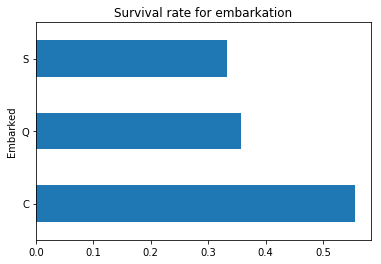

In [65]:
# group by embark
emb = titanic.groupby("Embarked")
emb["Survived"].mean().plot(kind="barh", title="Survival rate for embarkation")
plt.show()

In [66]:
titanic.pivot_table(values="Survived", index="Sex", columns="Embarked")

Embarked,C,Q,S
Sex,,,
female,0.902655,0.616667,0.680412
male,0.305732,0.111111,0.170418


In [67]:
titanic.pivot_table(values="Survived", index="Pclass", columns="Embarked")

Embarked,C,Q,S
Pclass,,,
1.0,0.687943,0.666667,0.559322
2.0,0.571429,0.285714,0.417355
3.0,0.366337,0.353982,0.210526


In [69]:
age = pd.cut(titanic['Age'], [0, 12, 18, 80])
titanic.pivot_table(values="Survived", index=["Sex", age], columns=["Embarked","Pclass"], aggfunc="count")


Embarked            C                Q                 S              
Pclass            1.0   2.0   3.0  1.0  2.0   3.0    1.0    2.0    3.0
Sex    Age                                                            
female (0, 12]    NaN   2.0   7.0  NaN  NaN   NaN    1.0   11.0   23.0
       (12, 18]   4.0   2.0   9.0  NaN  NaN   6.0    8.0    6.0   13.0
       (18, 80]  67.0   7.0  15.0  2.0  2.0  50.0   60.0   76.0   93.0
male   (0, 12]    1.0   1.0   5.0  NaN  NaN   5.0    3.0   10.0   25.0
       (12, 18]   3.0   NaN   3.0  NaN  NaN   NaN    1.0   10.0   34.0
       (18, 80]  66.0  16.0  62.0  1.0  5.0  52.0  104.0  129.0  306.0

Embarkation from Q mainly presents data for third class adults. S has a lot of male adults in third class in the dataset. Given that children and women had the priority for the lifeboats, it's not surprising that poor statistics from this database suggest a correlation between the passenger's city of boarding and its survival rate.